# 男生藏多少私房钱女生可以容忍！
## Vcamp团队任务
### 组员：刘刚，李宜烜，聂海，张琮，程林，顾岩，陈文燕，李思琪（无顺序）

In [61]:
import pandas as pd
import random
import numpy as np
sample_num = 256
feature_num = 9
df = pd.DataFrame(data=None,columns=range(0,feature_num), index=range(0,sample_num))
df.columns = ['w_age','w_salary','w_face','w_char','m_age','m_salary','m_face','m_char','pri-money']
index_line = [i for i in range(0,sample_num)]
df.index = index_line
for i in range(0,feature_num):
    if "salary" in df.columns[i] and 'pri-money' not in df.columns[i]: 
        df[df.columns[i]] = [random.uniform(0,5) for i in range(0,sample_num)]
    elif 'pri-money' not in df.columns[i]:
        df[df.columns[i]] = [random.uniform(0,3) for i in range(0,sample_num)]
df.head()

,w_age,w_salary,w_face,w_char,m_age,m_salary,m_face,m_char,pri-money
0,2.656773,4.488884,1.386232,1.901661,0.750170,4.813755,0.304983,0.972414,NaN
1,2.087105,4.860872,0.738657,1.816164,0.033609,1.441217,2.963096,0.111394,NaN
2,2.205231,2.004046,0.073831,0.416520,2.635808,0.851412,0.882568,2.893771,NaN
3,1.378556,0.786978,1.510135,2.234781,2.446611,4.373042,2.761783,1.171811,NaN
4,1.884050,1.552769,0.827750,2.603767,1.197961,1.656563,2.171830,0.325525,NaN


In [75]:
penc = [0.105, 0.175, 0.025, 0.185, 0.135, 0.145, 0.045, 0.185]
tmp = [0 for i in range(0,sample_num)]
for i in range(len(penc)):
    tmp += penc[i]*df[df.columns[i]]
df['pri-money'] = tmp
df['pri-money'][df['pri-money']<1]=0
# for i in range(0,df.shape[0]):
#     if df.loc[i,'pri-money']>1 and df.loc[i,'pri-money']<2:
#         df[i,'pri-money']=1
df['pri-money'][(df['pri-money']>1) & (df['pri-money']<2)]=1
df['pri-money'][df['pri-money']>2]=2
df.head()
#1.681030*penc[0]+3.071826*penc[1]+1.125127*penc[2]+0.883734*penc[3]+0.740135*penc[4]+0.319263*penc[5]+1.619885*penc[6]+2.922581*penc[7]

,w_age,w_salary,w_face,w_char,m_age,m_salary,m_face,m_char,pri-money
0,2.656773,4.488884,1.386232,1.901661,0.750170,4.813755,0.304983,0.972414,2.0
1,2.087105,4.860872,0.738657,1.816164,0.033609,1.441217,2.963096,0.111394,1.0
2,2.205231,2.004046,0.073831,0.416520,2.635808,0.851412,0.882568,2.893771,1.0
3,1.378556,0.786978,1.510135,2.234781,2.446611,4.373042,2.761783,1.171811,2.0
4,1.884050,1.552769,0.827750,2.603767,1.197961,1.656563,2.171830,0.325525,1.0


### 生成训练集，其中test传入待测试的特征，即交互界面上输入的特征

In [76]:
import math
df = round(df) #向上取整
train = df[0:220]
tmp = df[-1:]
tmp2 = df[200:]
test_y = tmp['pri-money']
valid_y = tmp2['pri-money'].values
valid = np.array(df[200:].drop(['pri-money'],axis = 1))
test = np.array([[3,2,2,2,1,2,3,3]])
train_y = train['pri-money']
# test_y = test['pri-money']
train = train.drop(['pri-money'],axis = 1)
#train = round(train+0.5)
print(train.shape,'\n',test)
print(valid_y)
train.head()

(220, 8) 
 [[3 2 2 2 1 2 3 3]]
[2. 0. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 0. 1. 1. 1. 2. 1. 2.
 1. 2. 2. 0. 1. 2. 2. 2. 1. 1. 1. 0. 1. 1. 1. 0. 2. 1. 2. 1. 1. 2. 1. 2.
 1. 1. 0. 2. 1. 1. 2. 1.]


,w_age,w_salary,w_face,w_char,m_age,m_salary,m_face,m_char
0,3.0,4.0,1.0,2.0,1.0,5.0,0.0,1.0
1,2.0,5.0,1.0,2.0,0.0,1.0,3.0,0.0
2,2.0,2.0,0.0,0.0,3.0,1.0,1.0,3.0
3,1.0,1.0,2.0,2.0,2.0,4.0,3.0,1.0
4,2.0,2.0,1.0,3.0,1.0,2.0,2.0,0.0


In [336]:
# train = df[0:200]
# test = df[200:df.shape[0]]
# train = df
# train_y = train['pri-money']
# # test_y = test['pri-money']
# train = train.drop(['pri-money'],axis = 1)
# test = test.drop(['pri-money'],axis = 1)
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
# print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (220, 8) 


In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 定义交叉验证函数

In [8]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmsle_cv_stacking(model,s_train,s_train_y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, s_train, s_train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 建立模型

In [9]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 10, bagging_fraction = 0.6,
                              bagging_freq = 10, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =8, min_sum_hessian_in_leaf = 8,verbose_eval=1)

In [10]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.8603, gamma=0.0168, 
                             learning_rate=0.06, max_depth=1, 
                             min_child_weight=1.0817, n_estimators=2200,
                             reg_alpha=0.0640, reg_lambda=0.8571,
                             subsample=0.1003, silent=1,
                             random_state =7, nthread = -1)


In [11]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.07,
                                   max_depth=1, max_features='sqrt',
                                   min_samples_leaf=8, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [12]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [13]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

## 单模型验证和打分

LGBM score: 0.3271 (0.0222)

[2.09329959 1.32764899 0.89857338 1.46825362 0.96438079 2.03378889
 1.51168588 1.74327655 1.67729716 1.31519394]


<Figure size 864x432 with 0 Axes>

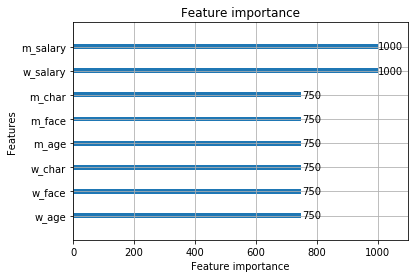

In [78]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


model_lgb.fit(train,train_y)
print(model_lgb.predict(train.values)[0:10])
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb,max_num_features=10)

#### 分类lgb

[1]	valid_0's multi_logloss: 0.976907
Training until validation scores don't improve for 40 rounds.
[2]	valid_0's multi_logloss: 0.956631
[3]	valid_0's multi_logloss: 0.93553
[4]	valid_0's multi_logloss: 0.919797
[5]	valid_0's multi_logloss: 0.903925
[6]	valid_0's multi_logloss: 0.896434
[7]	valid_0's multi_logloss: 0.882008
[8]	valid_0's multi_logloss: 0.869235
[9]	valid_0's multi_logloss: 0.857371
[10]	valid_0's multi_logloss: 0.850672
[11]	valid_0's multi_logloss: 0.838454
[12]	valid_0's multi_logloss: 0.829665
[13]	valid_0's multi_logloss: 0.824902
[14]	valid_0's multi_logloss: 0.814381
[15]	valid_0's multi_logloss: 0.807479
[16]	valid_0's multi_logloss: 0.802885
[17]	valid_0's multi_logloss: 0.794381
[18]	valid_0's multi_logloss: 0.78635
[19]	valid_0's multi_logloss: 0.783885
[20]	valid_0's multi_logloss: 0.776998
[21]	valid_0's multi_logloss: 0.774247
[22]	valid_0's multi_logloss: 0.767079
[23]	valid_0's multi_logloss: 0.759957
[24]	valid_0's multi_logloss: 0.755742
[25]	valid_0'

[278]	valid_0's multi_logloss: 0.407661
[279]	valid_0's multi_logloss: 0.407438
[280]	valid_0's multi_logloss: 0.407094
[281]	valid_0's multi_logloss: 0.407443
[282]	valid_0's multi_logloss: 0.406596
[283]	valid_0's multi_logloss: 0.406506
[284]	valid_0's multi_logloss: 0.406226
[285]	valid_0's multi_logloss: 0.406071
[286]	valid_0's multi_logloss: 0.405711
[287]	valid_0's multi_logloss: 0.405112
[288]	valid_0's multi_logloss: 0.40501
[289]	valid_0's multi_logloss: 0.404459
[290]	valid_0's multi_logloss: 0.403913
[291]	valid_0's multi_logloss: 0.403927
[292]	valid_0's multi_logloss: 0.403053
[293]	valid_0's multi_logloss: 0.402677
[294]	valid_0's multi_logloss: 0.40285
[295]	valid_0's multi_logloss: 0.402513
[296]	valid_0's multi_logloss: 0.401869
[297]	valid_0's multi_logloss: 0.401796
[298]	valid_0's multi_logloss: 0.40222
[299]	valid_0's multi_logloss: 0.401655
[300]	valid_0's multi_logloss: 0.401277
[301]	valid_0's multi_logloss: 0.40179
[302]	valid_0's multi_logloss: 0.401009
[303

[676]	valid_0's multi_logloss: 0.359039
[677]	valid_0's multi_logloss: 0.358709
[678]	valid_0's multi_logloss: 0.35889
[679]	valid_0's multi_logloss: 0.358954
[680]	valid_0's multi_logloss: 0.358954
[681]	valid_0's multi_logloss: 0.358654
[682]	valid_0's multi_logloss: 0.358786
[683]	valid_0's multi_logloss: 0.358936
[684]	valid_0's multi_logloss: 0.359128
[685]	valid_0's multi_logloss: 0.359126
[686]	valid_0's multi_logloss: 0.358993
[687]	valid_0's multi_logloss: 0.358988
[688]	valid_0's multi_logloss: 0.358557
Early stopping, best iteration is:
[648]	valid_0's multi_logloss: 0.358324
[1] 
 255    1.0
Name: pri-money, dtype: float64


<Figure size 864x432 with 0 Axes>

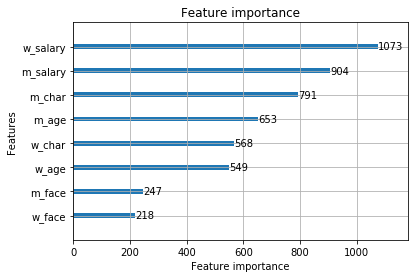

In [84]:
train_data=lgb.Dataset(train,label=train_y)
validation_data=lgb.Dataset(valid,label=valid_y)
params={
    'learning_rate':0.051,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':2,
    'objective':'multiclass',
    "num_boost_round":2000,
    "early_stopping_round":40,
    "verbose_eval":20,
    'num_class':3,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
}
clf=lgb.train(params,train_data,valid_sets=[validation_data])
# from sklearn.metrics import roc_auc_score,accuracy_score
y_pred=clf.predict(test)
y_pred=[list(x).index(max(x)) for x in y_pred]
print(y_pred,'\n',test_y)
# print(accuracy_score(y_test,y_pred))

plt.figure(figsize=(12,6))
lgb.plot_importance(clf,max_num_features=10)

In [339]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3181 (0.0182)



In [340]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3185 (0.0189)



In [341]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3111 (0.0157)



In [342]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3111 (0.0157)



## 模型融合Stacking test

In [370]:
base_models = (model_lgb, GBoost, ENet)
out_of_fold_predictions_test = np.zeros((test.shape[0], len(base_models)))
def stacking_fit(base_models, meta_model, X, y):
        base_models_ = [list() for x in base_models]
        meta_model_ = clone(meta_model)
        kfold = KFold(n_splits=5, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(base_models)))
        
        all_models_list = [[] for i in range(0,len(base_models))]
        for i, model in enumerate(base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                all_models_list[i].append(instance)
                y_pred = instance.predict(X[holdout_index])
                ## test_pred = instance.predict(test)
                out_of_fold_predictions[holdout_index, i] = y_pred
                ## out_of_fold_predictions_test[:, i] += test_pred
        return out_of_fold_predictions, all_models_list#out_of_fold_predictions_test/5
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        ##meta_model_.fit(out_of_fold_predictions, y)
        ##print(out_of_fold_predictions.shape)
out_of_fold_predictions, all_models_list = stacking_fit(base_models,
                             meta_model = lasso, X=train.values, y=train_y )
print(out_of_fold_predictions[0:5])

[[2.63520707 2.61662476 2.60549062]
 [2.65387132 2.62761558 2.62940182]
 [2.59306556 2.5842191  2.68748663]
 [2.62026492 2.60123315 2.64556676]
 [2.13401848 2.12228188 2.2653964 ]]


In [352]:
score = rmsle_cv_stacking(lasso, out_of_fold_predictions, train_y)
print("\nStacking score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Stacking score: 0.3189 (0.0103)



## Stacking predict
**np.round(lasso.predict(out_of_fold_predictions_test) 为界面输出值**

In [379]:
tmp_res_matrix = np.zeros((len(all_models_list), len(all_models_list[0]))) 
for i in range(len(all_models_list)):
    for j in range(len(all_models_list[0])):
        tmp_res_matrix[i][j] = all_models_list[i][j].predict(test)
out_of_fold_predictions_test = (np.array(tmp_res_matrix).sum(axis=1)/len(all_models_list[0]))[np.newaxis,:]
lasso.fit(out_of_fold_predictions, train_y)
print("test_predict:",np.round(lasso.predict(out_of_fold_predictions_test)))
## print('true_test_y:',test_y.values)

test_predict: [2.]


## 平均融合（测试用的，忽略）

In [306]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [307]:
averaged_models = AveragingModels(models = (model_lgb, GBoost, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3245 (0.0184)

